# Lab 2

In [104]:
%matplotlib notebook
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize
import seaborn as sns
import scipy.odr as odr
import matplotlib.ticker as mticker

from IPython.display import Image
from decimal import Decimal
from astropy.modeling import models, fitting
from math import pi

# Equipment
- Digital multimeter (DMM)
- Analog Discovery 2
- Laptop with WaveForms installed
- Breadboard adaptor
- Large breadboard
- Components
    - 1 kΩ resistors
    - 10 kΩ potentiometer
    - 1N4001 diode
    - Jumper wires

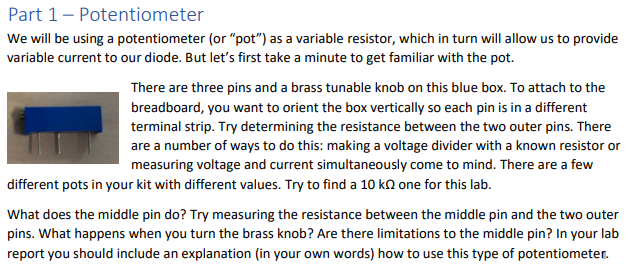

In [105]:
Image("Part1.png")

I attempted to change the resistance by hooking it up to a multimeter and cranking the dial before hooking up a power source but it did not work

I then hooked up the power soure and checked the resistance accross the end furthest from the knob to the middle and it didn't seem to work

I hooked up the potentiometer with a Red LED off of the center pin so I can get a viual representation of changing the resistance

The middle pin is the out pin for the potentiometer. Basically you have a powered and grounded potentiometer with the other two pins and the middle pin allows a current to go at a decreased resistance depending on the screw setting. There was a maximum travel distance for the potentiometer in both directions. This seemed to corelate with the numbers on the potentiometer. I had 3 potentiometers 102, 103, 104. Each potentiometer had a different maximum resistance for the 102 it was 100, 1000 for the 103, and 10000 for the 104. image of my circut is below. 

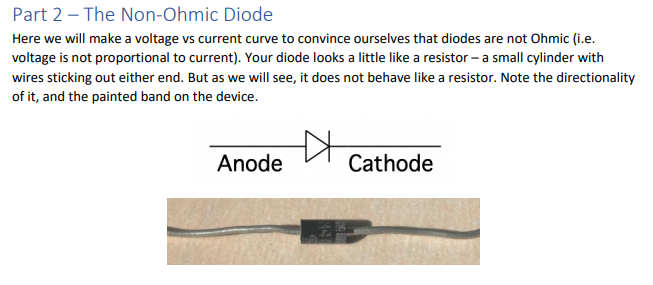

In [106]:
Image("Part2.png")

I grabbed a resistor of 990Ω and a 1N4001 diode

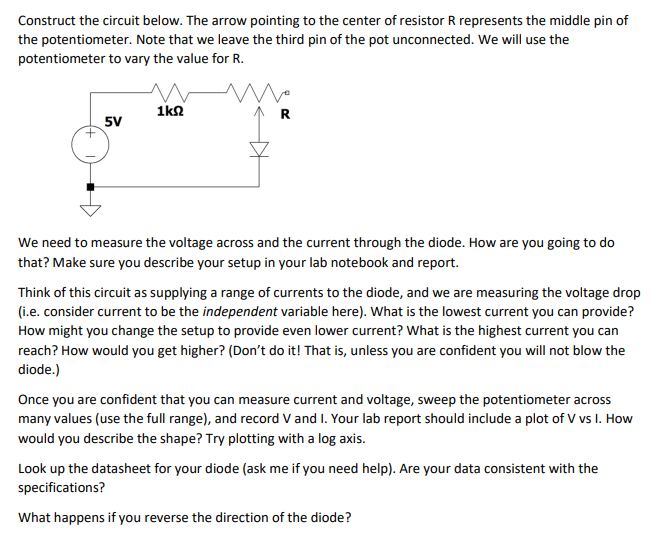

In [107]:
Image("Part2-2.png")

I found it took roughly 25 turns to max out the resistance on my potentiometer thusly 1 turn is roughly 4 hundred ohms. using this I am going to make a chart that measures the changer in voltage against my predicted change in resistance

When I was dialing in the current X resistance I noticed that at about 4k ohms the current was at a low but before and after it was high. 

<IPython.core.display.Javascript object>


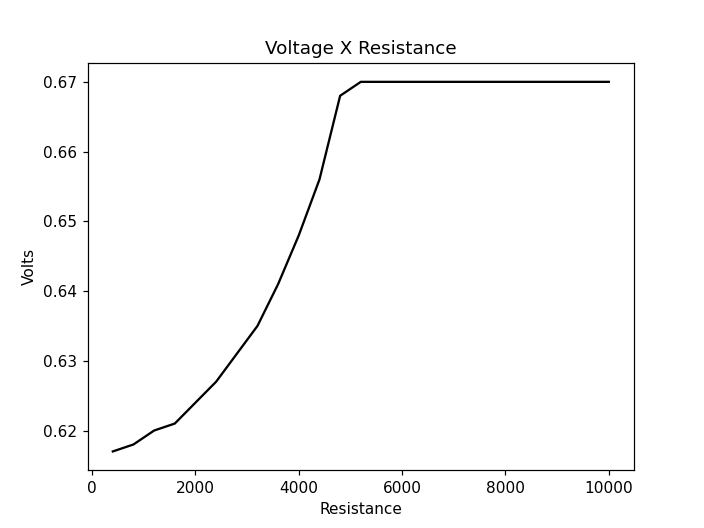

Text(0, 0.5, 'Volts')

In [108]:
plt.figure(1)
R = np.array([400,800,1200,1600,2000,2400,2800,3200,3600,4000,
              4400,4800,5200,5600,6000,6400,6800,7200,7600,8000,
             8400,8800,9200,9600,10000])
V = np.array([.617,.618,.620,.621,.624,.627,.631,.635,.641,.648,.656,.668,
             .670,.670,.670,.670,.670,.670,.670,.670,.670,.670,.670,.670,.670])
I = np.array([5.52,5.13,4.2,3.41,2.99,2.65,2.44,2.22,2.1,1.98,1.83,
              1.81,1.82,1.85,1.99,2.07,2.22,2.4,2.62,2.98,3.57,4.38,
              5.79,8.83,16.78])*10**(-3)
plt.plot(R,V,color = "black")
plt.title("Voltage X Resistance")
plt.xlabel("Resistance")
plt.ylabel("Volts")

<IPython.core.display.Javascript object>


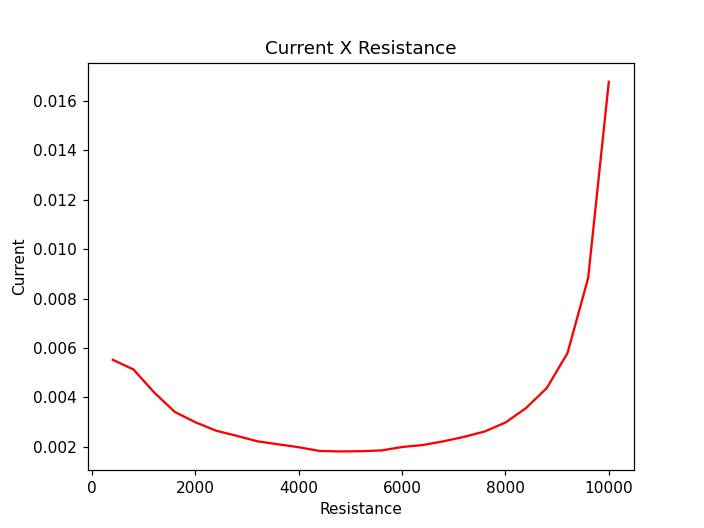

Text(0, 0.5, 'Current')

In [109]:
plt.figure(2)
plt.plot(R,I,color = "red")
plt.title("Current X Resistance")
plt.xlabel("Resistance")
plt.ylabel("Current")

<IPython.core.display.Javascript object>


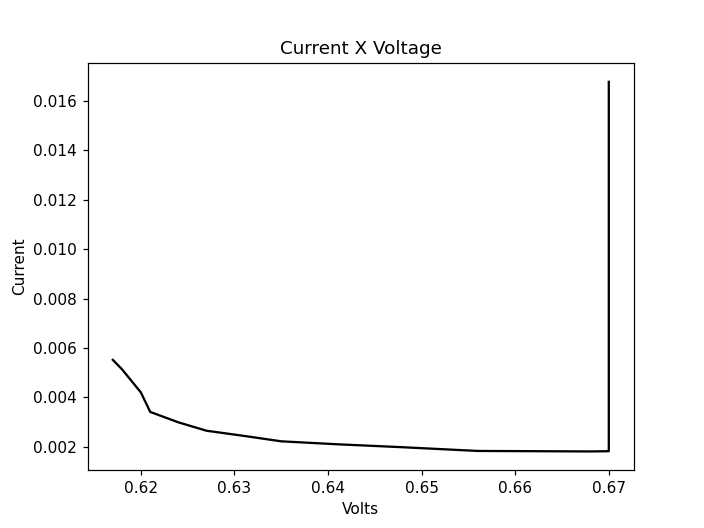

Text(0.5, 0, 'Volts')

In [110]:
plt.figure(3)
plt.plot(V,I,color = "black")
plt.title("Current X Voltage")
plt.ylabel("Current")
plt.xlabel("Volts")

<IPython.core.display.Javascript object>


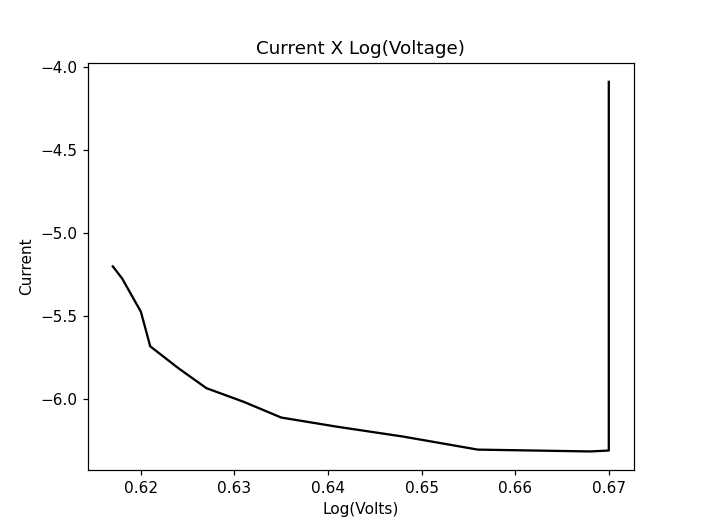

Text(0.5, 0, 'Log(Volts)')

In [111]:
plt.figure(4)
plt.plot(V,np.log(I),color = "black")
plt.title("Current X Log(Voltage)")
plt.ylabel("Current")
plt.xlabel("Log(Volts)")

It looks like Log voltage looks a little better but not much. I still have that long verticle line from when the voltage topped off the resistance and the current sky rocketed. 

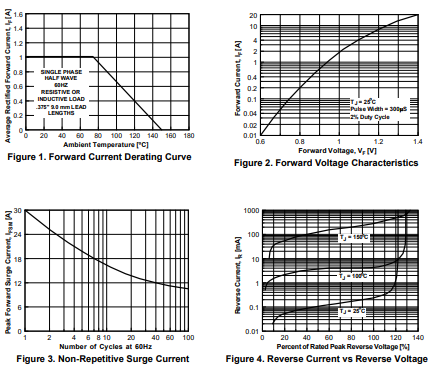

In [112]:
Image("datasheet.png")

My results don't seem to be remotely close to the datasheet which pardon my french pisses me off. I have been working on this everyday for hours trying to figure out what I am using to make measurements, How to use this waveform thing, and trying to figure out why the hell I am so lost. This entire lab felt like things I should be able to know and figure out quickly. So come to my suprise I have to spend 3 hours fiddling around with this hunk of junk before figuring out I never turned on the source voltage BECAUSE I NEVER KNEW I HAD TO DO THAT. 

This was a less than enjoyable lab however, i learned a lot about the tools I am handling throungh my fruitless efforts. and I learned for whatever reason diodes have a peak minimum resistance then they lull as resistance is slowly increased and according to all my experimentation the current sky rockets after you hit a certain resistance. Is that true short answer kind of. The datasheet i was reading had 4 different graphs none of which looked like mine but each had parts of my graph within it. 

It is a diode if you revers its direction current is not allowed to flow I don't even need to test that. I swear to god if I get this wrong I am gonna lose it. 

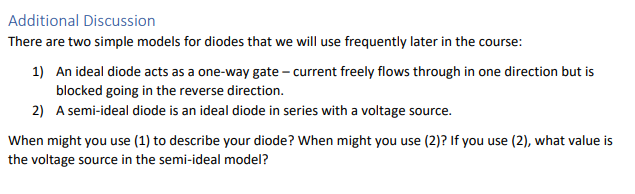

In [113]:
Image("Part3.png")

If I wanted to make a simple circut that limited the maount of times I would need to use kchikoffs law I would slap oodles and oodles of one way gate in my system. This makes calculating a lot easier and possibly current splitting. 


If I had a voltage sourec in series with a diode I would be able to limit the amount of flow back and from my source voltage. this might make it easier to use more sensitive electronics. The quantity is gonna be some combination made by my diode and voltage source. 

In [114]:
Z = 1/(1j*2*pi*1000*10*10**(-9))
i = (900+Z)/(1900+Z)
print(i)

(0.9926044991789721-0.06194897433193542j)
